In [131]:
!pip install binance_historical_data mplfinance darts


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [132]:
from binance_historical_data import BinanceDataDumper

data_dumper = BinanceDataDumper(
    path_dir_where_to_dump=".",
    asset_class="spot",  # spot, um, cm
    data_type="klines",  # aggTrades, klines, trades
    data_frequency="1m",
)

print(data_dumper.get_list_all_trading_pairs())

data_dumper.dump_data(tickers=["NEARUSDT"])

['ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'QTUMETH', 'EOSETH', 'SNTETH', 'BNTETH', 'BCCBTC', 'GASBTC', 'BNBETH', 'BTCUSDT', 'ETHUSDT', 'HSRBTC', 'OAXETH', 'DNTETH', 'MCOETH', 'ICNETH', 'MCOBTC', 'WTCBTC', 'WTCETH', 'LRCBTC', 'LRCETH', 'QTUMBTC', 'YOYOBTC', 'OMGBTC', 'OMGETH', 'ZRXBTC', 'ZRXETH', 'STRATBTC', 'STRATETH', 'SNGLSBTC', 'SNGLSETH', 'BQXBTC', 'BQXETH', 'KNCBTC', 'KNCETH', 'FUNBTC', 'FUNETH', 'SNMBTC', 'SNMETH', 'NEOETH', 'IOTABTC', 'IOTAETH', 'LINKBTC', 'LINKETH', 'XVGBTC', 'XVGETH', 'SALTBTC', 'SALTETH', 'MDABTC', 'MDAETH', 'MTLBTC', 'MTLETH', 'SUBBTC', 'SUBETH', 'EOSBTC', 'SNTBTC', 'ETCETH', 'ETCBTC', 'MTHBTC', 'MTHETH', 'ENGBTC', 'ENGETH', 'DNTBTC', 'ZECBTC', 'ZECETH', 'BNTBTC', 'ASTBTC', 'ASTETH', 'DASHBTC', 'DASHETH', 'OAXBTC', 'ICNBTC', 'BTGBTC', 'BTGETH', 'EVXBTC', 'EVXETH', 'REQBTC', 'REQETH', 'VIBBTC', 'VIBETH', 'HSRETH', 'TRXBTC', 'TRXETH', 'POWRBTC', 'POWRETH', 'ARKBTC', 'ARKETH', 'YOYOETH', 'XRPBTC', 'XRPETH', 'MODBTC', 'MODETH', 'ENJBTC', 'ENJETH', 'STORJBTC', 'ST

Tickers:   0%|          | 0/1 [00:00<?, ?it/s]

monthly files to download:   0%|          | 0/1 [00:00<?, ?files/s]

daily files to download: 0files [00:00, ?files/s]

In [133]:
import pandas as pd
import numpy as np
import os

filenames = next(os.walk("./spot/monthly/klines/NEARUSDT/1m"), (None, None, []))[2]  # [] if no file

columns = [
    "Open time",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Close time",
    "Quote asset volume",
    "Number of trades",
    "Taker buy base asset volume",
    "Taker buy quote asset volume",
    "Ignore"
]

df = pd.DataFrame(columns=columns)

for f in filenames:
    new_df = pd.read_csv(f"./spot/monthly/klines/NEARUSDT/1m/{f}", header=None, names=columns)
    df = pd.concat([df, new_df])
df = df.sort_values(by="Open time")
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1602651600000,1.3000,1.8800,1.3000,1.3760,1429560.44,1602651659999,2.313165e+06,1848,520043.50,837306.088337,0
1,1602651660000,1.3759,1.4000,1.1111,1.2493,987505.68,1602651719999,1.205528e+06,1392,614158.78,747451.518743,0
2,1602651720000,1.2489,1.3593,1.1660,1.2552,549711.33,1602651779999,6.942747e+05,1103,277203.12,349648.438905,0
3,1602651780000,1.2499,1.2500,1.1359,1.1742,343258.80,1602651839999,4.081314e+05,773,170461.39,202748.271257,0
4,1602651840000,1.1754,1.2752,1.1753,1.2300,243382.88,1602651899999,2.965310e+05,440,170472.03,207510.362489,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44635,1690847700000,1.3710,1.3710,1.3690,1.3690,5932.20,1690847759999,8.131457e+03,23,0.00,0.000000,0
44636,1690847760000,1.3690,1.3690,1.3690,1.3690,81.30,1690847819999,1.112997e+02,3,81.30,111.299700,0
44637,1690847820000,1.3690,1.3700,1.3690,1.3690,1278.00,1690847879999,1.749664e+03,10,438.10,599.840400,0
44638,1690847880000,1.3690,1.3700,1.3690,1.3700,468.60,1690847939999,6.415331e+02,6,468.60,641.533100,0


In [134]:
OHLC_COLUMNS = [
    "Open",
    "High",
    "Low",
    "Close"]
dataset = df.loc[:, OHLC_COLUMNS].astype(np.float64)
dataset = pd.DataFrame(dataset.to_numpy(), columns=OHLC_COLUMNS)

# add technical indicators to dataset
dataset['SMA_256'] = dataset['Close'].rolling(window=256).mean()
dataset['SMA_512'] = dataset['Close'].rolling(window=512).mean()
dataset['SMA_1024'] = dataset['Close'].rolling(window=1024).mean()

# convert SMA columns to distance in percentages from "Close"
dataset['SMA_256'] = ((dataset['Close'] - dataset['SMA_256']) / dataset['SMA_256'])
dataset['SMA_512'] = ((dataset['Close'] - dataset['SMA_512']) / dataset['SMA_512'])
dataset['SMA_1024'] = ((dataset['Close'] - dataset['SMA_1024']) / dataset['SMA_1024'])

# drop NaN rows resulting from the SMA calculations and reset index
dataset = dataset.dropna().reset_index(drop=True)
dataset

,Open,High,Low,Close,SMA_512,SMA_1024,SMA_4096
0,0.7531,0.7540,0.7506,0.7512,-0.105323,-0.144309,-0.302967
1,0.7521,0.7547,0.7504,0.7504,-0.105994,-0.145028,-0.303611
2,0.7527,0.7582,0.7526,0.7581,-0.096551,-0.136071,-0.296387
3,0.7585,0.7604,0.7583,0.7599,-0.094172,-0.133838,-0.294637
4,0.7600,0.7611,0.7593,0.7606,-0.093092,-0.132856,-0.293921
...,...,...,...,...,...,...,...
1464416,1.3710,1.3710,1.3690,1.3690,-0.001843,-0.010031,-0.020798
1464417,1.3690,1.3690,1.3690,1.3690,-0.001824,-0.010010,-0.020793
1464418,1.3690,1.3700,1.3690,1.3690,-0.001804,-0.009989,-0.020788
1464419,1.3690,1.3700,1.3690,1.3700,-0.001057,-0.009247,-0.020067


In [217]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


class MultiScaler:
    def __init__(self, min_max: MinMaxScaler, std: StandardScaler):
        self.min_max = min_max
        self.std = std


def preprocess(df, scaler=None):
    # Apply percentage change only to OHLC columns
    df_pct = df[OHLC_COLUMNS].pct_change()
    
    # clamp
    df_pct[df_pct > 0.1] = 0.1
    df_pct[df_pct < -0.1] = -0.1

    # Concatenate the percentage-changed OHLC with the other columns
    df_all = pd.concat([df_pct, df.drop(columns=OHLC_COLUMNS)], axis=1)

    # Drop NA values (from pct_change operation)
    df_all = df_all.dropna().reset_index(drop=True)

    # Apply MinMax scaling to all columns
    scaler = MultiScaler(MinMaxScaler(), StandardScaler()) if scaler is None else scaler
    df_scaled = pd.DataFrame(scaler.min_max.fit_transform(scaler.std.fit_transform(df_all)),
                             columns=df_all.columns,
                             index=df_all.index)

    return df_scaled, scaler


def invert_preprocess(original_start, scaler: MultiScaler, df):
    original_start = original_start[OHLC_COLUMNS].to_numpy()
    # Invert MinMax scaling for all columns
    df_inv_scaled = pd.DataFrame(scaler.std.inverse_transform(scaler.min_max.inverse_transform(df)),
                                 columns=df.columns,
                                 index=df.index)

    # Recover the original OHLC values
    reversed_array = np.cumprod(1 + df_inv_scaled[OHLC_COLUMNS].to_numpy(), axis=0)
    reversed_array = reversed_array * original_start  # Scaling by the original_start to each element

    df_inv_scaled[OHLC_COLUMNS] = reversed_array

    return df_inv_scaled


preprocessed_dataset, scaler = preprocess(dataset)
preprocessed_dataset

,Open,High,Low,Close,SMA_512,SMA_1024,SMA_4096
0,0.493361,0.504642,0.498668,0.485496,0.266599,0.253977,0.155452
1,0.503989,0.523188,0.514659,0.543155,0.274854,0.261623,0.161966
2,0.538528,0.514508,0.537869,0.503005,0.276933,0.263528,0.163544
3,0.509888,0.504603,0.506594,0.495607,0.277877,0.264367,0.164189
4,0.500658,0.493431,0.439418,0.458790,0.273096,0.259854,0.160239
...,...,...,...,...,...,...,...
1464415,0.500000,0.500000,0.492706,0.483491,0.357639,0.369208,0.410454
1464416,0.492706,0.492706,0.500000,0.490917,0.357655,0.369226,0.410459
1464417,0.500000,0.503652,0.500000,0.490917,0.357672,0.369244,0.410463
1464418,0.500000,0.500000,0.500000,0.494636,0.358326,0.369878,0.411113


In [218]:
from sklearn.metrics import mean_absolute_error


def test_preprocess_invert_preprocess(original_df):
    original_df = original_df.iloc[:8000]
    preprocessed_df, scaler = preprocess(original_df)

    # Assume that 'original_start' is the first row of the original DataFrame
    original_start = original_df.iloc[0]

    inverted_df = invert_preprocess(original_start, scaler, preprocessed_df)

    mae_list = []
    for col in original_df.columns:
        # Start from the second row of the original_df for comparison
        mae = mean_absolute_error(original_df.iloc[1:][col], inverted_df[col])
        mae_list.append(mae)
        print(f"Mean Absolute Error for {col}: {mae}")

    avg_mae = sum(mae_list) / len(mae_list)
    print(f"Average MAE: {avg_mae}")

    return avg_mae < 1e-9


# Assuming 'dataset' is your original DataFrame
assert test_preprocess_invert_preprocess(dataset)

Mean Absolute Error for Open: 1.8611607233914956e-15
Mean Absolute Error for High: 4.527652995199361e-15
Mean Absolute Error for Low: 5.1052909729322e-15
Mean Absolute Error for Close: 3.327615578870875e-15
Mean Absolute Error for SMA_512: 4.540654755885997e-18
Mean Absolute Error for SMA_1024: 6.0680855815498745e-18
Mean Absolute Error for SMA_4096: 9.456179143426938e-18
Average MAE: 2.120255027124971e-15


<Axes: xlabel='time'>

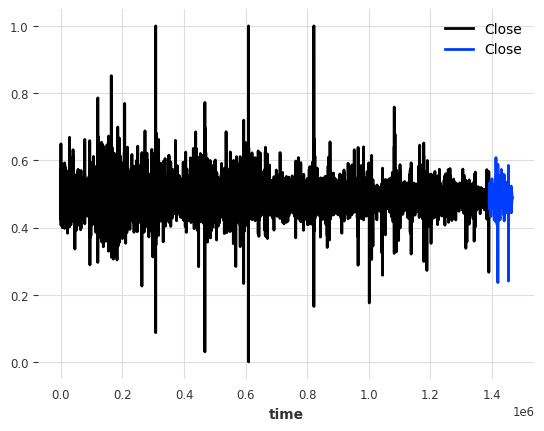

In [219]:
import numpy as np
import pandas as pd

from darts import TimeSeries
from darts.models import RNNModel

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

target_series = TimeSeries.from_dataframe(preprocessed_dataset)
target_train, target_val = target_series.split_after(0.95)

target_train["Close"].plot()
target_val["Close"].plot()

In [225]:
from darts.models import TFTModel

SEQUENCE_LENGTH = 128
PREDICTION_LENGTH = 32
# my_model = RNNModel(
#     model="LSTM",
#     hidden_dim=64,
#     n_rnn_layers=4,
#     dropout=0.1,
#     batch_size=4096,
#     n_epochs=10,
#     # optimizer_kwargs={"lr": 1e-3},
#     # random_state=0,
#     training_length=SEQUENCE_LENGTH,
#     input_chunk_length=SEQUENCE_LENGTH,
#     # likelihood=GaussianLikelihood(),
# )

# my_model = TFTModel(
#     input_chunk_length=SEQUENCE_LENGTH,
#     output_chunk_length=PREDICTION_LENGTH,
#     hidden_size=128,
#     lstm_layers=2,
#     num_attention_heads=4,
#     dropout=0.1,
#     batch_size=512,
#     n_epochs=1,
#     add_relative_index=True,
#     add_encoders=None,
#     random_state=42,
# )

# my_model = TFTModel.load("model-weights-1693758552.932289.pt")
my_model = RNNModel.load("model-weights-1693938214.4048839.pt")

# my_model.fit(target_train, val_series=target_val, verbose=True)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.33 GiB (GPU 0; 3.94 GiB total capacity; 381.32 MiB already allocated; 1.26 GiB free; 1.45 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# 
# import time
# import os
# try:
#   os.makedirs("./drive/MyDrive/colab/model-weights/")
# except:
#   pass
# my_model.save(f"./drive/MyDrive/colab/model-weights/model-weights-{time.time()}.pt")

In [ ]:
def backtest(testing_model, series):
    # Compute the backtest predictions with the two models
    pred_err = testing_model.backtest(
        series=series,
        forecast_horizon=PREDICTION_LENGTH,
        stride=10,
        retrain=False,
        verbose=False,
    )
    print("MAPE:", pred_err)


backtest(my_model, target_val)

Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='time'>

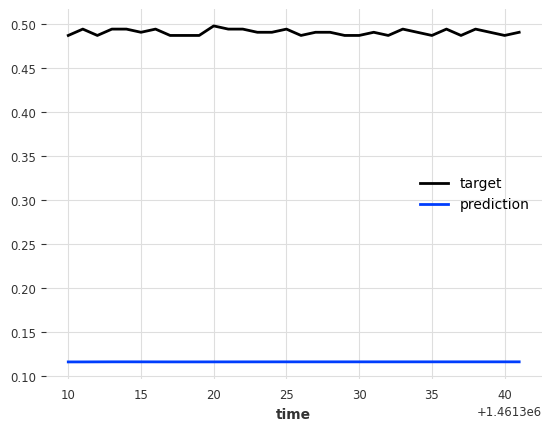

In [221]:
OFFSET_BACK = 3110
predict_X = target_series[-SEQUENCE_LENGTH - OFFSET_BACK:-OFFSET_BACK]
assert len(predict_X) == SEQUENCE_LENGTH
pred: TimeSeries = my_model.predict(PREDICTION_LENGTH, predict_X)

target_val["Close"].slice_intersect(pred["Close"]).plot(label="target")
pred["Close"].plot(label="prediction")

In [222]:
original_start = dataset.iloc[predict_X[-1].time_index.start]
inverted_pred = invert_preprocess(original_start, scaler, pred.pd_dataframe())
inverted_pred

component,Open,High,Low,Close,SMA_512,SMA_1024,SMA_4096
time,,,,,,,
1461310,1.303657,1.303051,1.327508,1.307169,0.032036,0.027956,-0.065000
1461311,1.205344,1.203381,1.249857,1.210982,0.034007,0.030420,-0.063465
1461312,1.114474,1.111348,1.176784,1.121884,0.036806,0.033817,-0.063166
1461313,1.030483,1.026353,1.108017,1.039351,0.039023,0.036328,-0.066316
1461314,0.952829,0.947852,1.043292,0.962891,0.040323,0.037536,-0.072371
1461315,0.881005,0.875355,0.982357,0.892052,0.040968,0.037903,-0.079307
1461316,0.814553,0.808409,0.924980,0.826419,0.041193,0.037885,-0.085297
1461317,0.753066,0.746593,0.870952,0.765613,0.041033,0.037616,-0.089448
1461318,0.696181,0.689512,0.820078,0.709280,0.040412,0.036990,-0.091774


In [223]:
PLOT_BEFORE_PREDICTION = 30
inverted_target = invert_preprocess(original_start, scaler, target_series[
                                                            predict_X[-1].time_index.stop - PLOT_BEFORE_PREDICTION:
                                                            predict_X[
                                                                -1].time_index.stop + PREDICTION_LENGTH].pd_dataframe())
inverted_target

component,Open,High,Low,Close,SMA_512,SMA_1024,SMA_4096
time,,,,,,,
1461280,1.410000,1.411000,1.410000,1.411000,0.002088,0.003824,0.015595
1461281,1.410000,1.411000,1.410000,1.411000,0.002081,0.003819,0.015588
1461282,1.410000,1.411000,1.408998,1.409997,0.001363,0.003101,0.014860
1461283,1.410000,1.411000,1.408998,1.411000,0.002070,0.003809,0.015576
1461284,1.410000,1.411000,1.410000,1.411000,0.002064,0.003803,0.015570
...,...,...,...,...,...,...,...
1461337,1.414009,1.415011,1.414009,1.415011,0.004254,0.006262,0.018011
1461338,1.415011,1.416014,1.415011,1.416014,0.004949,0.006969,0.018724
1461339,1.415011,1.416014,1.415011,1.416014,0.004935,0.006962,0.018715


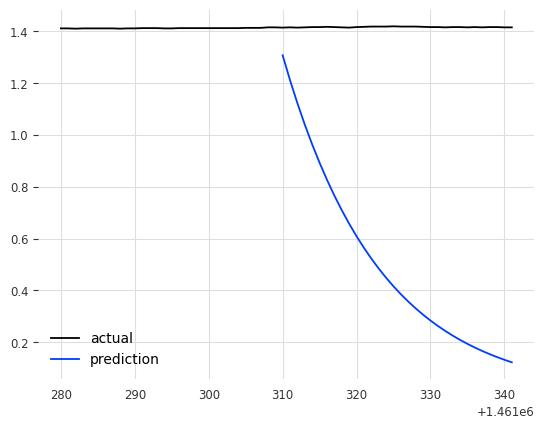

In [224]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Create a DataFrame from the 'candlesticks' array
candlesticks_df = pd.DataFrame(inverted_target, columns=OHLC_COLUMNS)
candlesticks_pred_df = pd.DataFrame(inverted_pred, columns=OHLC_COLUMNS)

plt.plot(candlesticks_df["Close"], label="actual")
plt.plot(candlesticks_pred_df["Close"], label="prediction")
plt.legend()

# Adding a fake date index (mplfinance needs this)
# candlesticks_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_df.shape[0])
# candlesticks_df['Date'] = candlesticks_df['Date'].apply(mdates.date2num)
# candlesticks_pred_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_pred_df.shape[0])
# candlesticks_pred_df['Date'] = candlesticks_pred_df['Date'].apply(mdates.date2num)
# 
# # Reordering columns to fit mplfinance requirements
# candlesticks_df = candlesticks_df[['Date', 'Open', 'High', 'Low', 'Close']]
# candlesticks_pred_df = candlesticks_pred_df[['Date', 'Open', 'High', 'Low', 'Close']]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 10))
# 
# candlestick_ohlc(ax, candlesticks_pred_df.values, width=0.6, colorup='lime', colordown='magenta', alpha=0.5)
# candlestick_ohlc(ax, candlesticks_df.values, width=0.6, colorup='g', colordown='r', alpha=0.5)

plt.show()